<a href="https://colab.research.google.com/github/2303a52317/2303A52317/blob/main/lab_5_Aiml_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [3]:
df=pd.read_csv("/content/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


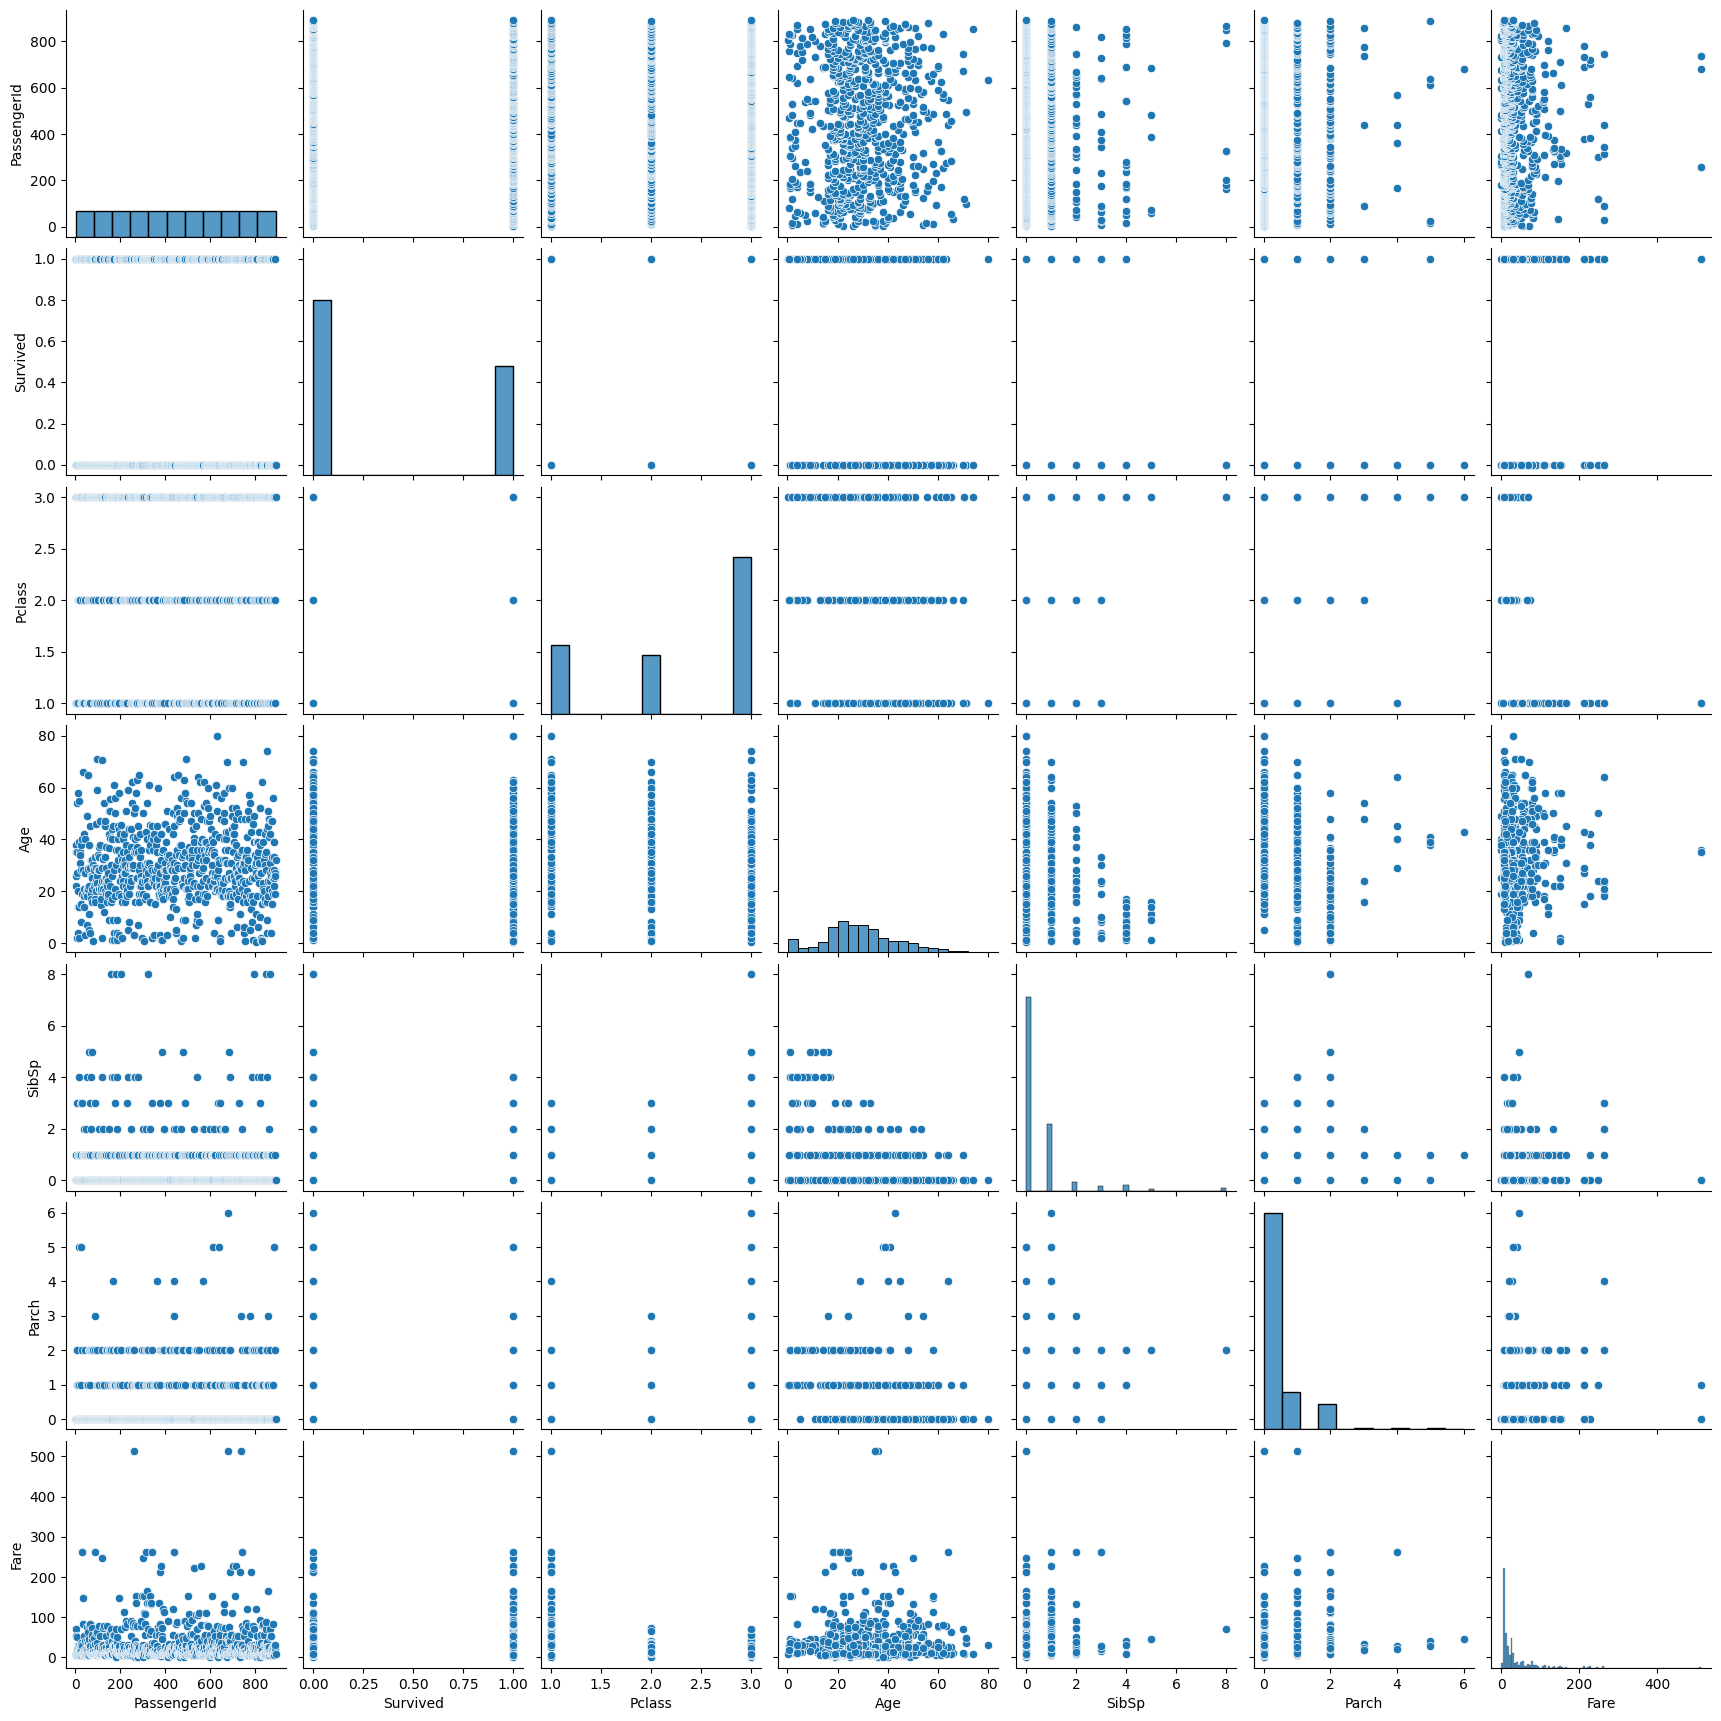

In [6]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

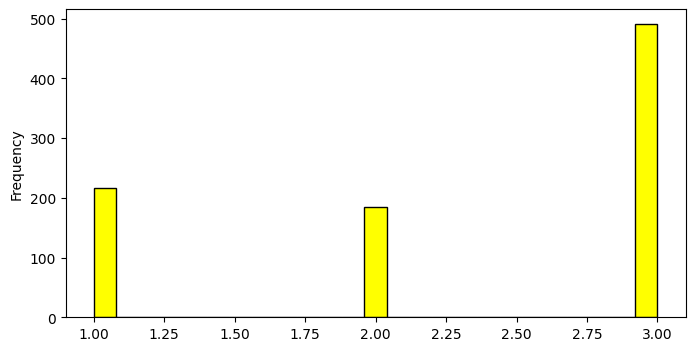

In [7]:
df['Pclass'].plot.hist(bins=25,figsize=(8,4),color = 'yellow', edgecolor = 'black')

<Axes: ylabel='Frequency'>

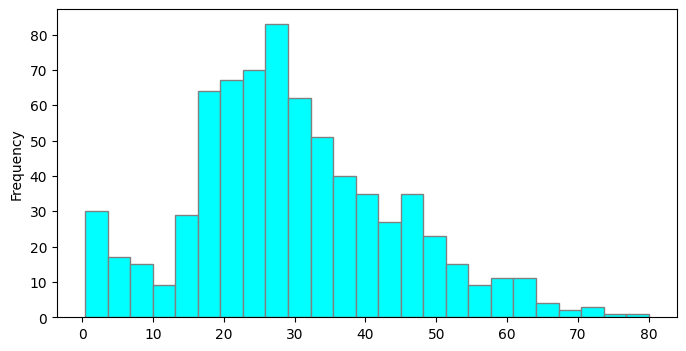

In [8]:
df['Age'].plot.hist(bins=25,figsize=(8,4),color = 'Cyan', edgecolor = 'Grey')

<Axes: ylabel='Frequency'>

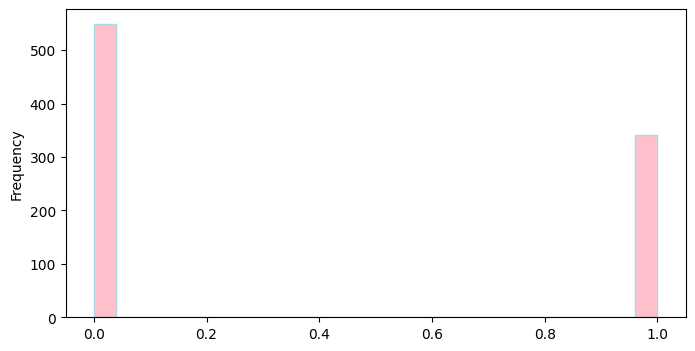

In [9]:
df['Survived'].plot.hist(bins=25,figsize=(8,4),color = 'Pink', edgecolor = 'LightBlue')

<Axes: ylabel='Frequency'>

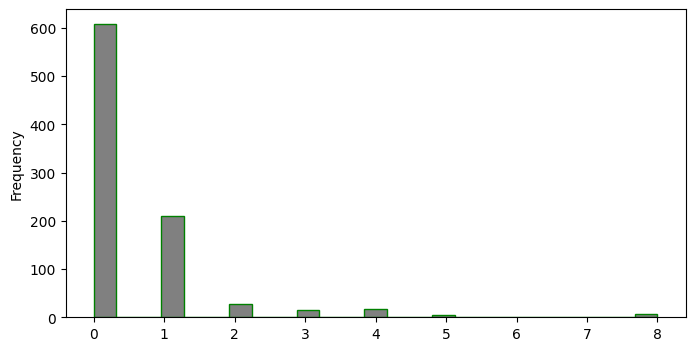

In [10]:
df['SibSp'].plot.hist(bins=25,figsize=(8,4),color = 'Grey',edgecolor = 'Green')

<Axes: ylabel='Frequency'>

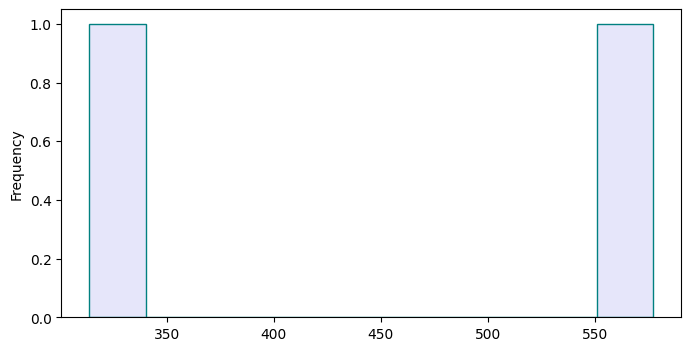

In [11]:
df['Sex'].value_counts().plot.hist(figsize=(8,4),color = 'Lavender', edgecolor = 'Teal')

<Axes: xlabel='Sex'>

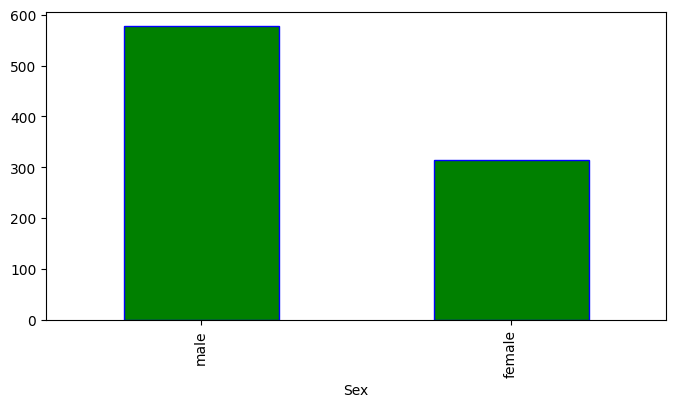

In [12]:
df['Sex'].value_counts().plot.bar(figsize=(8,4),color = 'Green',edgecolor = 'Blue')

<Axes: >

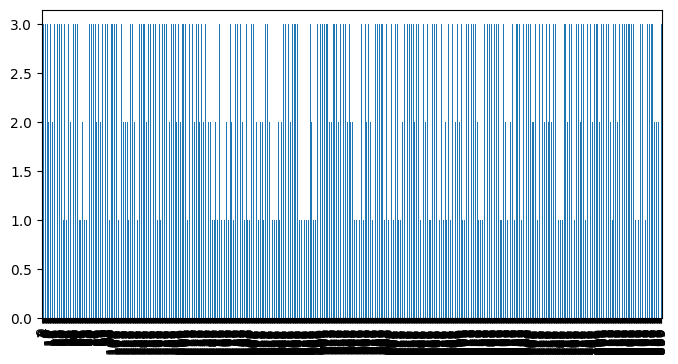

In [13]:
df['Pclass'].plot.bar(figsize=(8,4))

<Axes: >

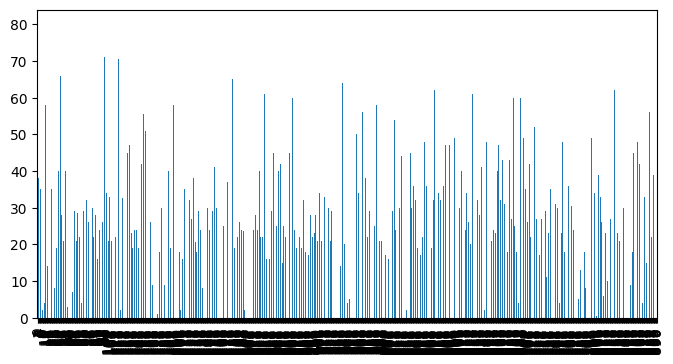

In [14]:
df['Age'].plot.bar(figsize=(8,4))

<Axes: xlabel='Survived'>

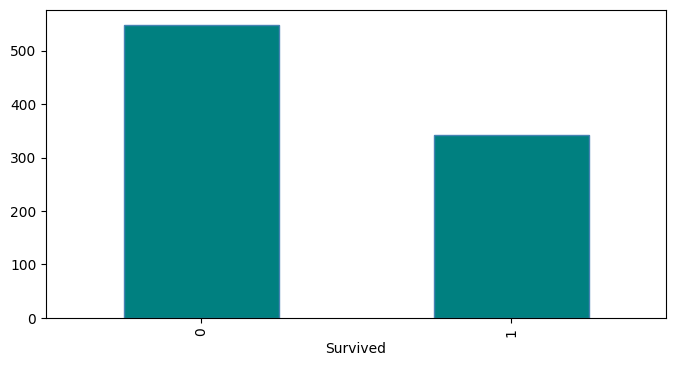

In [15]:
df['Survived'].value_counts().plot.bar(figsize=(8,4),color = 'Teal',edgecolor = 'Steelblue')

<Axes: xlabel='SibSp'>

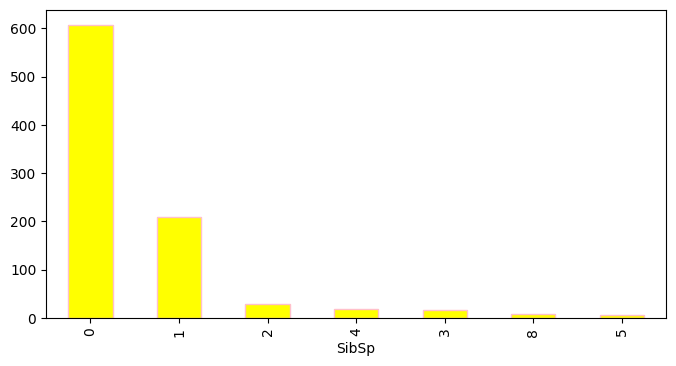

In [16]:
df['SibSp'].value_counts().plot.bar(figsize=(8,4),color = 'Yellow',edgecolor = 'Pink')

<Axes: xlabel='Pclass', ylabel='Age'>

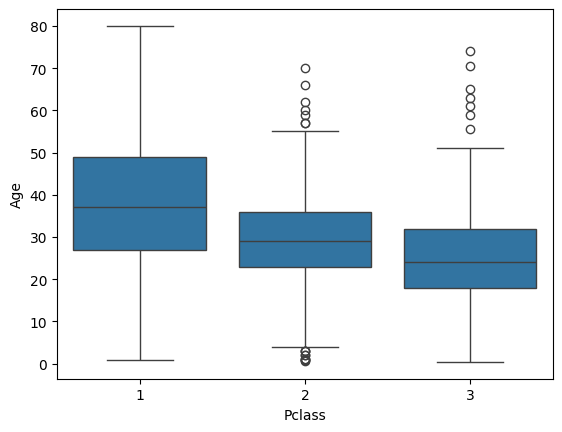

In [17]:
sns.boxplot(x = 'Pclass',y = 'Age',data = df)

<Axes: xlabel='Age', ylabel='Survived'>

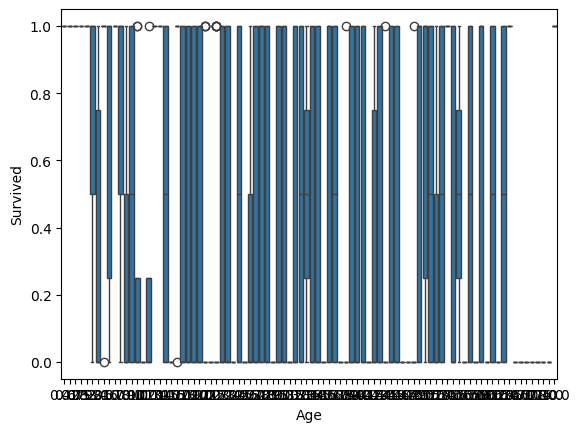

In [18]:
sns.boxplot(x = 'Age',y = 'Survived',data = df)

<Axes: xlabel='Pclass'>

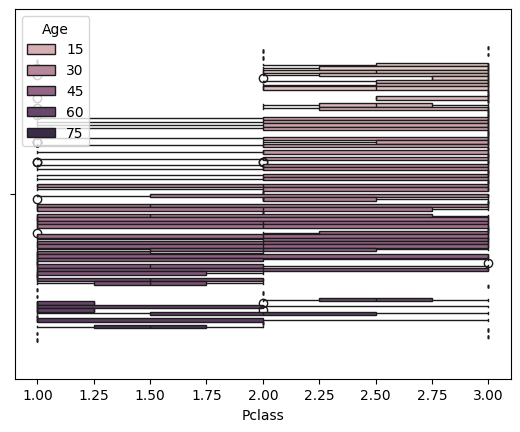

In [19]:
sns.boxplot(x = 'Pclass',hue = 'Age',data = df)

<Axes: xlabel='Age'>

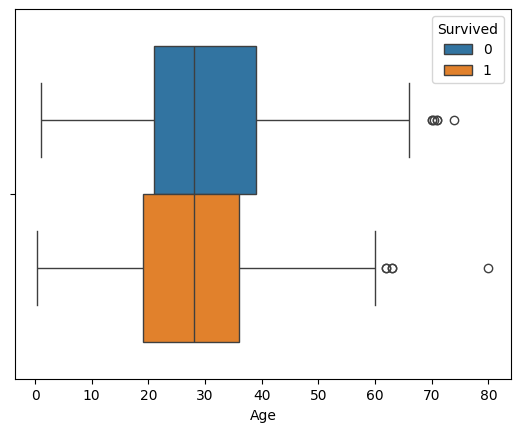

In [20]:
sns.boxplot(x = 'Age',hue = 'Survived',data = df)

<Axes: >

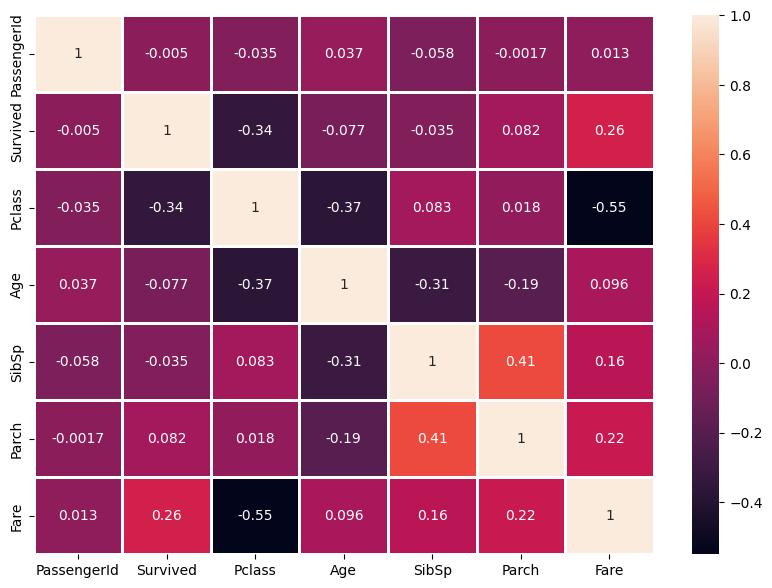

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,linewidths=2)

<Axes: >

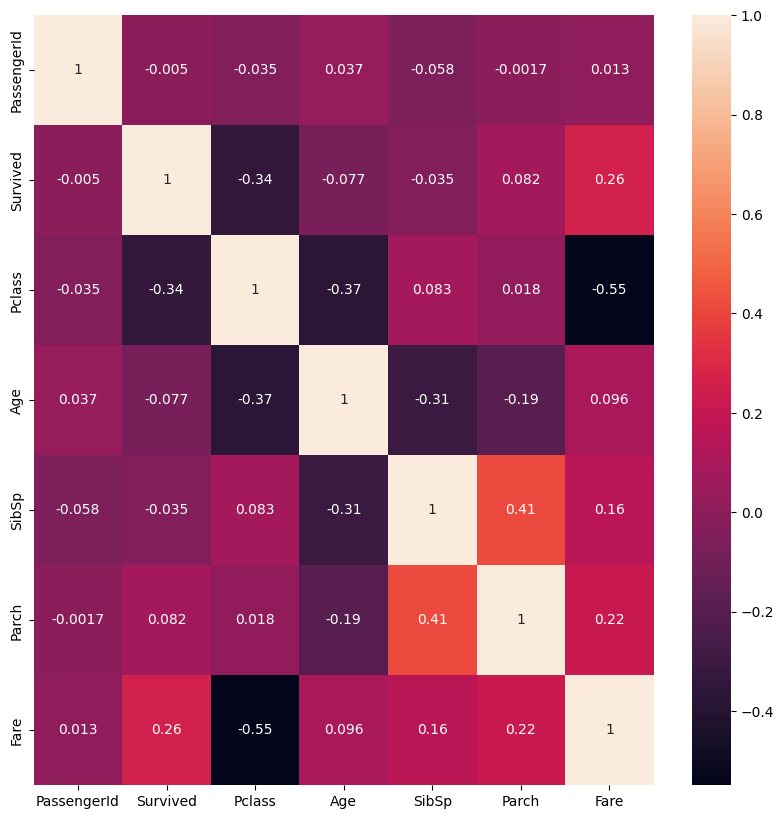

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

In [23]:
# Select only numeric columns before calculating correlation.
df.select_dtypes(include=np.number).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
# Fill missing ages with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [25]:
# Drop unnecessary features
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [26]:
# Convert categorical variables into numeric form
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'].fillna(0, inplace=True)  # Handle missing values in 'Embarked'

In [ ]:
#part 2

In [27]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
log_reg = LogisticRegression(max_iter=1000)

In [29]:
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [30]:
LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

In [31]:
Y_pred = log_reg.predict(X_test)

f1 = f1_score(Y_test, Y_pred)
print("F1 Score: ",f1)

F1 Score:  0.75


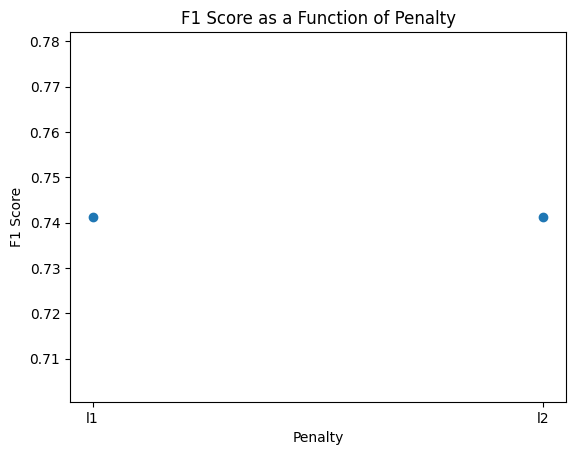

In [32]:
penalties = ['l1', 'l2']
f1_scores = []

for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='liblinear')
    model.fit(X_train, Y_train)
    Y_pred_penalty = model.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_pred_penalty))

plt.scatter(penalties, f1_scores)
plt.title('F1 Score as a Function of Penalty')
plt.ylabel('F1 Score')
plt.xlabel('Penalty')
plt.show()